In [2]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
from random import shuffle
import pandas as pd
from scipy import optimize
import math

In [79]:
def ajustelineal(ejex,ejey):
##########
# Fitting the data -- Least Squares Method
##########
    powerlaw = lambda x, amp, index: amp * (x**index)
# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#
    yerr=np.zeros(len(ejey))

    logx = np.log10(ejex)
    logy = np.log10(ejey)
    logyerr = np.ones(len(ejey))


# define our (line) fitting function
    fitfunc = lambda p, x: p[0] + p[1] * x
    errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

    pinit = [1.0, -1.0]
    out = optimize.leastsq(errfunc, pinit,args=(logx, logy, logyerr), full_output=1)


    pfinal = out[0]
    covar = out[1]
    print(pfinal)
    print(covar)

    index = pfinal[1]
    amp = 10.0**pfinal[0]

    indexErr = np.sqrt( covar[1][1] )
    ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

    plt.clf()
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    plt.plot(ejex, powerlaw(ejex, amp, index))     # Fit
    plt.errorbar(ejex,ejey, yerr=yerr, fmt='k.')  # Data
    plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
    plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
    plt.title('Best Fit Power Law')
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.xlim(1, 2500)

    plt.subplot(1, 2, 2)
    plt.loglog(ejex, powerlaw(ejex, amp, index))
    plt.errorbar(ejex, ejey, yerr=yerr, fmt='k.')  # Data
    plt.xlabel('X (log scale)')
    plt.ylabel('Y (log scale)')
    #plt.xlim(1.0, 2500)

In [3]:
G = nx.read_gml('netscience.gml')
H = nx.read_gml('as-22july06.gml')

In [5]:
N=len(G.nodes())
M=len(H.nodes())
print(N,M)

1589 22963


<Figure size 1440x1440 with 0 Axes>

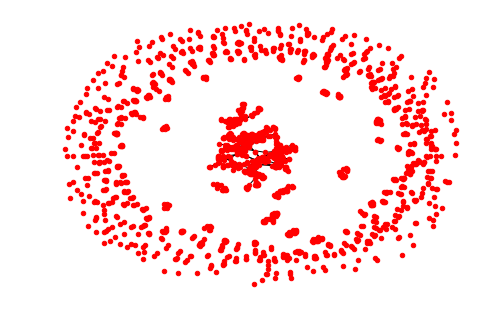

<Figure size 1440x1440 with 0 Axes>

In [6]:
nx.draw(G,node_size=20)
plt.figure(figsize=(20,20))

In [7]:
degree =[float(degree) for node,degree in G.degree()]
A_G=nx.adjacency_matrix(G)
degreeH =[float(degree) for node,degree in H.degree()]
A_H=nx.adjacency_matrix(H)

In [8]:
kmean=A_G.dot(degree)
for k in range(len(kmean)):
    if degree[k]!=0:
        kmean[k]=kmean[k]/degree[k]
    else:
        kmean[k]=0
    
kmeanH=A_H.dot(degreeH)
for k in range(len(kmeanH)):
    if degreeH[k]!=0:
        kmeanH[k]=kmeanH[k]/degreeH[k]
    else:
        kmeanH[k]=0
        
kmeanH[75]

1657.0

CHEQUEAMOS UN CASO...

In [9]:
A_H[75].sum()

2

In [10]:
for j in range (A_H.shape[1]):
    if A_H[75,j]==1:
        print(j)

2
22


In [11]:
degreeH[2],degreeH[22]

(2016.0, 1298.0)

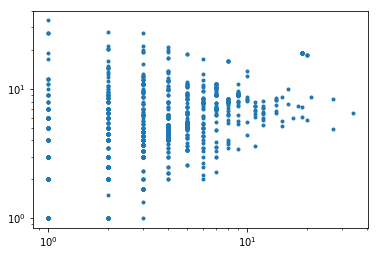

In [12]:
plt.loglog(degree,kmean,'.') #plot de G

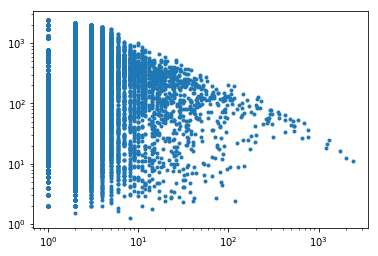

In [13]:
plt.loglog(degreeH,kmeanH,'.') #plot de H

In [31]:
k_ordenado=sorted(degree)
k_ordenadoH=sorted(degreeH)

In [15]:
kmm=[]
set_degree=set(degree)

kmmH=[]
set_degreeH=set(degreeH)


In [16]:
degree_arr_int = np.array(list(set([int(degree) for node,degree in G.degree()])))

degree_arr_intH = np.array(list(set([int(degree) for node,degree in H.degree()])))


In [17]:
type(degree_arr_int[0])

numpy.int64

In [18]:
kmm = np.zeros(len(degree_arr_int))
for i,d in enumerate(degree_arr_int):
     kmm[i]=np.mean(kmean[degree==d])
        
kmmH = np.zeros(len(degree_arr_intH))
for i,d in enumerate(degree_arr_intH):
     kmmH[i]=np.mean(kmeanH[degreeH==d])

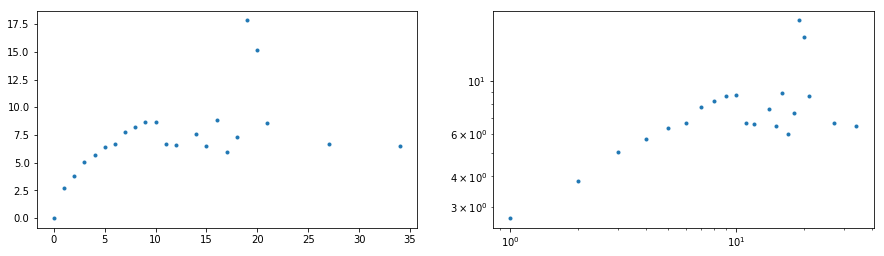

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1) #grafico de G
plt.plot(degree_arr_int,kmm,'.')
plt.subplot(1, 2, 2)
plt.loglog(degree_arr_int,kmm,'.')


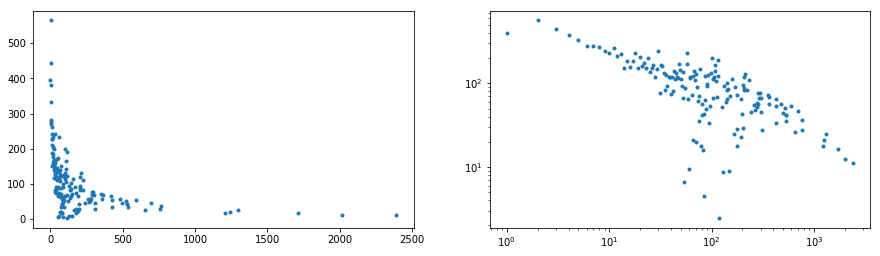

In [82]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1) #Grafico de H
plt.plot(degree_arr_intH,kmmH,'.')
plt.subplot(1, 2, 2)
plt.loglog(degree_arr_intH,kmmH,'.')

EL AJUSTE:

[0.51912558 0.34994186]
[[ 0.38085032 -0.34944267]
 [-0.34944267  0.36644274]]


<Figure size 432x288 with 0 Axes>

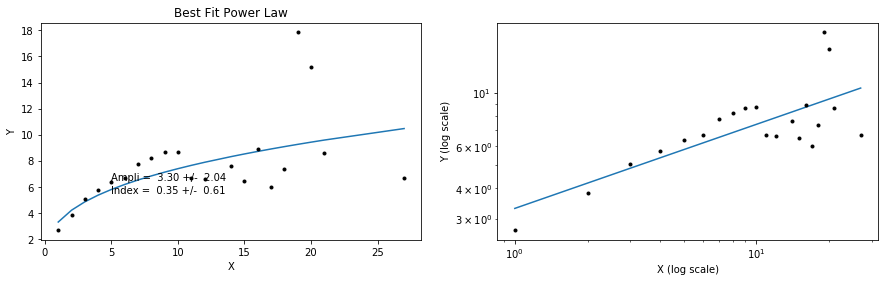

In [87]:
ajustelineal(degree_arr_int[1:-1],kmm[1:-1])

[ 2.7480526  -0.44417355]
[[ 0.07526371 -0.0355933 ]
 [-0.0355933   0.01834666]]


<Figure size 432x288 with 0 Axes>

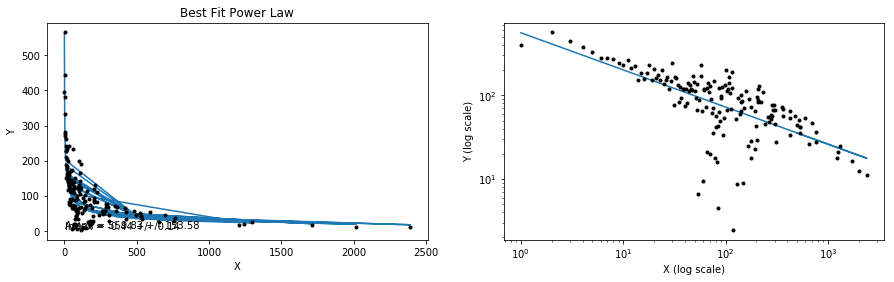

In [83]:
ajustelineal(degree_arr_intH,kmmH)

VOY A PROBAR SI MEJORA HACIENDO EL GRAFICO CON BINEO LOGARITMICO PARA H

Para no quedarme con la sensacion de que promedio sobre promedios, sobre promedios, voy a hacer el binneo logaritmico de una, y a eso tomarle valor medio.. (Pruebo para H)

/home/josefina/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/josefina/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


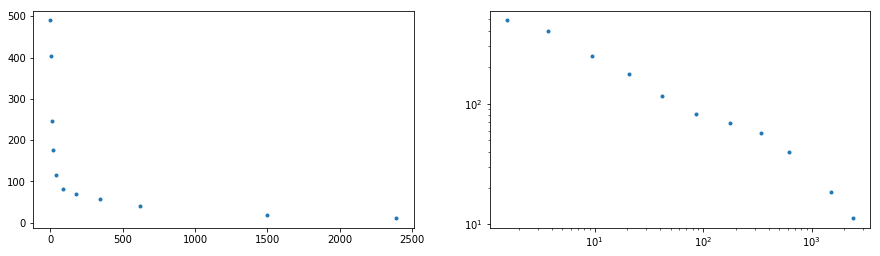

In [77]:
i_max=12

serie2=[]
serie2.append(0)
for kk in range(i_max):
    serie2.append(serie[kk]+2**kk)
    
q=[]
p=[]
for i in range(len(serie2)):
    jdg=[]
    xxx=[]
    for j in range(len(degreeH)):
        if 0<=degreeH[j]-serie2[i]<2**i:
            xxx.append(degreeH[j])
            jdg.append(kmeanH[j])
    p.append(np.mean(xxx))
    q.append(np.mean(jdg))
    
ejey=q[1:-1]
ejex=p[1:-1]
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1) #Grafico de H
plt.plot(ejex,ejey,'.')
plt.subplot(1, 2, 2)
plt.loglog(ejex,ejey,'.')


[ 2.86814676 -0.48857731]
[[ 0.41073289 -0.16973992]
 [-0.16973992  0.09008599]]


<Figure size 432x288 with 0 Axes>

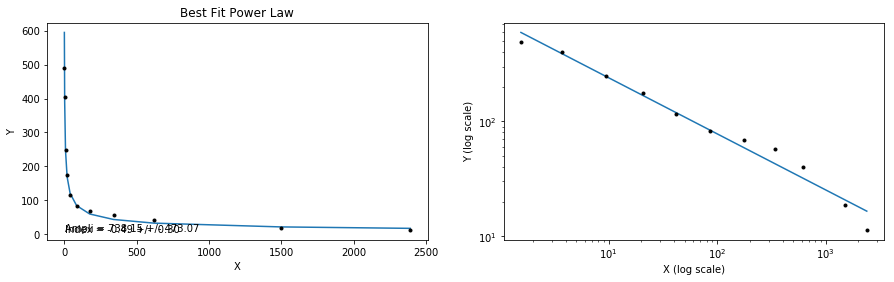

In [88]:
ajustelineal(ejex,ejey)

 (iv) $r=\frac{\sum_{ij}(A_{ij}-k_{i}k_{j}/2m)k_{i}k_{j}}{\sum_{ij}(k_{i}\delta_{ij}-k_{i}k_{j}/2m)k_{i}k_{j}}$

In [92]:
rG=nx.degree_assortativity_coefficient(G)
rH=nx.degree_assortativity_coefficient(H)
print(rG,rH)

0.4616224667525834 -0.19838487512056457


En el libro de Newman esta super explicado porque dan estos coeficientes... http://materias.df.uba.ar/IRCBSa2016c2/files/2016/08/Mark-Newman-Networks_-An-Introduction-Oxford-University-Press-USA-2010.pdf (p√°gina 266)

# b. script para las redes Y2H y APMS